In [1]:
import numpy as np

class LSH(object):
    def __init__(self, hash_size, vectors):
        self.m, self.inv_m, self.b = self.PCA_projection(hash_size, vectors)
        self.d = dict()
        
    def fill(self, vectors):
        hashes = self.get_hash(vectors)
        self.d = dict()
        for n,h in enumerate(hashes):
            th = tuple(h)
            if th in self.d: self.d[th].add(n)
            else: self.d[th] = {n}
        
    def PCA_projection(self, hash_size, vectors):
        cov = np.cov(vectors.T)
        c, v = np.linalg.eigh(cov)
        inv_v = np.linalg.inv(v)
        proj = v[:,-hash_size:]
        inv_proj = inv_v[-hash_size:]
        
        t = vectors.dot(proj)
        med = np.median(t, axis=0)
        
        return proj, inv_proj, -med
        
    def get_soft_hash(self, vec):
        return vec.dot(self.m)+self.b
    
    def get_hash(self, vec):
        return (self.get_soft_hash(vec) >= 0) + 0
    
    def __contains__(self, h):
        return tuple(h) in self.d
    
    def __getitem__(self, vec):
        h = tuple(self.get_hash(vec))
        if h in self: return self.d[h]
        else: return set()
        
    def __len__(self):
        return len(self.d)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_bucket(bucket, max_size=6):
    s = min(int(np.ceil(len(bucket)**.5)), max_size)
    fig=plt.figure(figsize=(10, 11))
    for i, img_id in zip(range(1, s**2 +1), bucket):
        img = mnist.valid.x[img_id].reshape(28, 28)
        fig.add_subplot(s, s, i)
        plt.title('Id: {}'.format(img_id))
        plt.imshow(img, cmap='gray'); plt.axis('off')
    plt.show()

In [3]:
n = number_of_bits = 10

from loaders import Mnist
mnist = Mnist()
lsh = LSH(n, mnist.train.x)
lsh.fill(mnist.valid.x)
print('{} out of {} buckets are used'.format(len(lsh), 2**n))

946 out of 1024 buckets are used


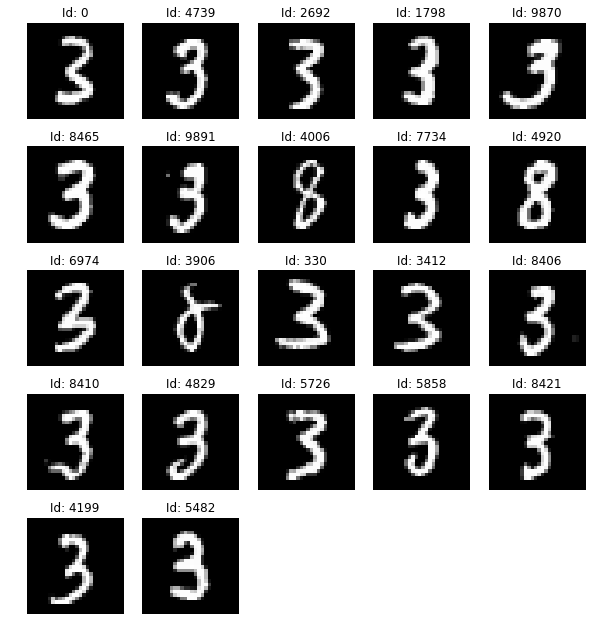

In [4]:
bucket = lsh[mnist.valid.x[0]]
show_bucket(bucket)